In [1]:
import os
import tawnycalc as tc

In [2]:
# configure some parameters
removal_fraction = {}
removal_fraction["g"] = 0.8

PT_steps = []
PT_steps.append( (11.0, 600 ) )
PT_steps.append( (12.0, 630 ) )
PT_steps.append( (12.2, 650 ) )
PT_steps.append( (11.5, 670 ) )
PT_steps.append( (10.0, 660 ) )

In [3]:
# Load baseline setup files from `gtfrac` directory
context = tc.Context(scripts_dir="./gtfrac")

In [4]:
context.prefs

calcmode     : 1
scriptfile   : gtfrac
dataset      : 62
setpagewidth : 700
dontwrap     : no
monitorheap  : no

In [5]:
context.script

axfile         : mb50NCKFMASHTO
autoexit       : yes
with           : chl bi pa ep ru g ilm sph
inexcess       : mu q H2O
dogmin         : 1
maxvar         : 6
diagramPT      : 2 20 400 1100 # new script
pseudosection  : yes

rbi :
               H2O       SiO2      Al2O3     CaO       MgO       FeO       K2O       Na2O      TiO2      O
g    0.0       0.0       3.0       0.984049  0.230147  0.395429  2.406326  0.0       0.0       0.0       0.015951
mu   0.159799  1.0       3.102219  1.39308   0.004483  0.058473  0.053149  0.386538  0.11122   0.0       0.00246
pa   0.006915  1.0       2.98401   1.505704  0.019628  0.001993  0.002589  0.03377   0.456416  0.0       0.000473
bi   0.090237  0.932353  2.842048  0.63675   0.0       1.244448  1.572357  0.5       0.0       0.067647  0.021202
ilm  0.004242  0.0       0.0       0.0       0.0       0.011126  1.032649  0.0       0.0       0.956225  0.043775
q    0.240992  0.0       1.0       0.0       0.0       0.0       0.0       0.0       0.0    

In [6]:
modes = []
step = 0
for P,T in PT_steps:
    # set required windows
    context.script["calcP"] = "{} {}".format(P,P)
    context.script["calcT"] = "{} {}".format(T,T)
    
    # execute
    results = context.execute()
    modes.append((results.modes,step))
    
    # set resultant rbi back on script
    print("Executing for P,T = {},{}".format(P,T))
    context.script["rbi"] = results.rbi
    # remove required phases
    for phase, removal_frac in removal_fraction.items():
        if phase in context.script["rbi"].keys():
            phase_post_solve = context.script["rbi"][phase]["mode"] 
            context.script["rbi"][phase]["mode"] *= (1.-removal_frac)
            print("Phase {} before = {} after = {}".format(phase, phase_post_solve, context.script["rbi"][phase]["mode"] ))
            # get rid of it here too for viz purposes
    
    # record new values to new dict for viz purposes
    final_modes = {}
    for key,val in context.script["rbi"].items():
        final_modes[key] = val["mode"]
    modes.append((final_modes,step))
    step += 1

Executing for P,T = 11.0,600
Phase g before = 0.002576 after = 0.0005152
Executing for P,T = 12.0,630
Phase g before = 0.002505 after = 0.0005009999999999998
Executing for P,T = 12.2,650
Phase g before = 0.000774 after = 0.00015479999999999997
Executing for P,T = 11.5,670
Phase g before = 0.0326 after = 0.006519999999999998
Executing for P,T = 10.0,660


<IPython.core.display.Javascript object>


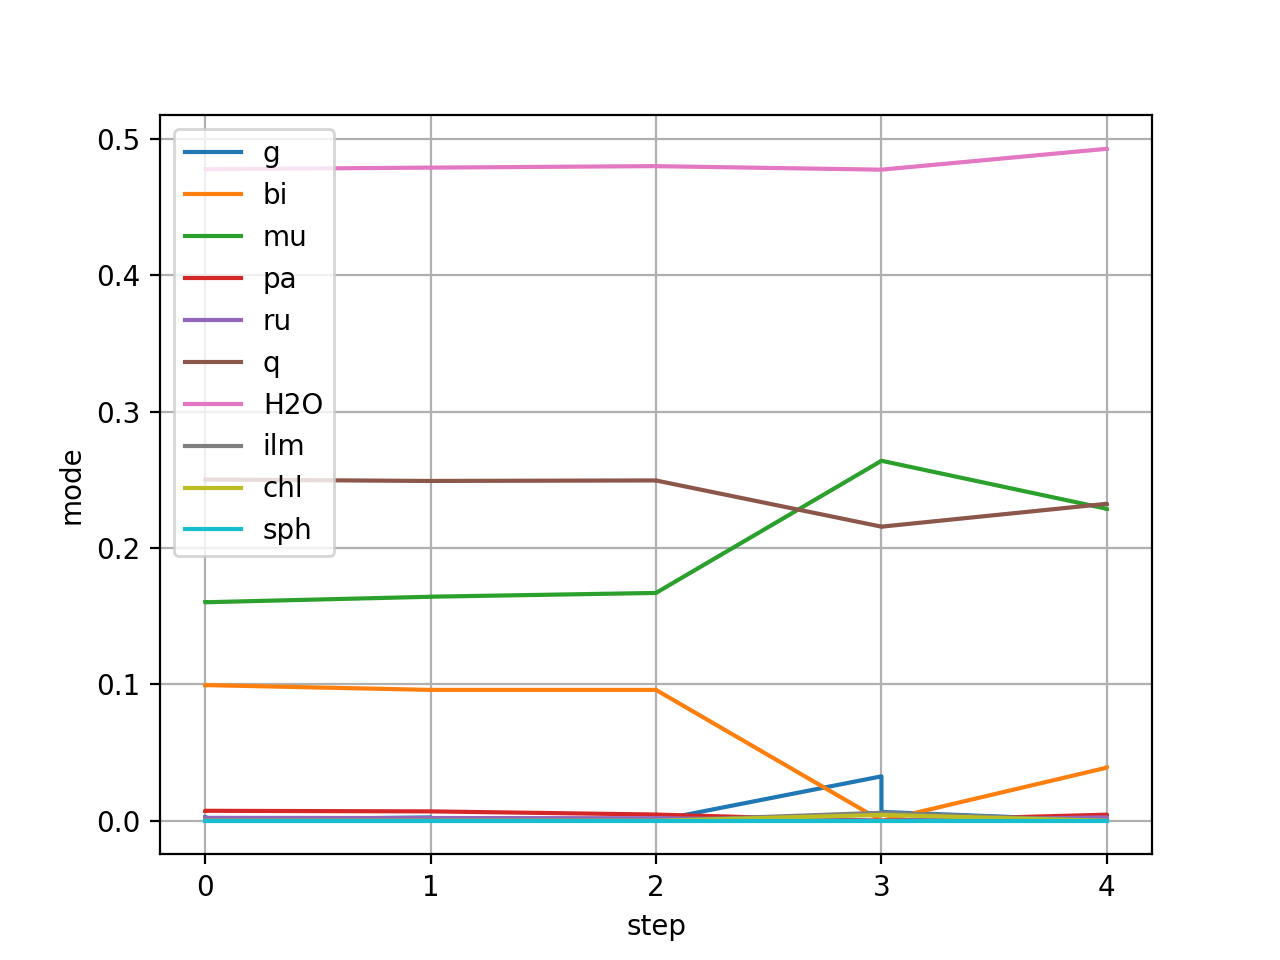

In [7]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# collect data
# use a default dictionary which starts with the required array
from collections import defaultdict
datas = defaultdict(lambda: np.zeros(2*step))
steps = []
count=0
for mode,stepp in modes:
    steps.append(stepp)
    for key, val in mode.items():
        datas[key][count] = val
    count+=1

fig, ax = plt.subplots()
for key, val in datas.items():
    ax.plot(steps, val,label=key)

ax.set(xlabel='step', ylabel='mode')
ax.grid()
plt.xticks(np.arange(0, step, step=1))
plt.legend()
plt.show()

In [8]:
context.print_output()

THERMOCALC 3.50 (Free Pascal version)

summary output in the file, "tc-gtfrac-o.txt"
other (eg drawpd) output in the file, "tc-gtfrac-dr.txt"
details of calc results in the file, "tc-gtfrac-ic.txt"
initial tables in the file, "tc-gtfrac-it.txt"
csv format in the file, "tc-gtfrac.csv"
more csv format in the file, "tc-gtfrac2.csv"
(these files may not all be populated yet, depending on the calcs;
 thermocalc should delete empty files at the end of each run)
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

THERMOCALC 3.50 running at 14.30 on Wed 16 Dec,2020
using tc-ds62.txt produced at 20.08 on Mon 6 Feb,2012
with axfile tc-mb50NCKFMASHTO.txt and scriptfile tc-gtfrac.txt

reading ax: L hb aug dio opx g ol ksp plc pli sp ilm ilmm ep bi mu chl ru sph q 
            an ab H2O 

with: g ilm ep bi mu pa chl ru sph q H2O  (from script)
fluid is just H2O
in excess: mu q H2O

specification of xyz starting guesses of phases
in the scriptfile: g ep bi mu pa chl; not in the scriptfile: